In [1]:
# 1. Pose a preliminary question

# What are the valuation of companies relative to the overall market?

In [2]:
# 2. Find the appropriate data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [4]:
stat = pd.read_csv('FS_sp500_stats.csv')
stat[:10]

,Unnamed: 0,Ticker,Attribute,Recent
0,0,A,Market Cap (intraday) 5,46.31B
1,1,A,Enterprise Value 3,47.74B
2,2,A,Trailing P/E,47.65
3,3,A,Forward P/E 1,31.35
4,4,A,PEG Ratio (5 yr expected) 1,2.12
5,5,A,Price/Sales (ttm),7.68
6,6,A,Price/Book (mrq),9.36
7,7,A,Enterprise Value/Revenue 3,7.55
8,8,A,Enterprise Value/EBITDA 7,27.09
9,9,AAL,Market Cap (intraday) 5,12.61B


In [5]:
# 3. Get the data into a usable form

In [6]:
new_stat = stat.set_index('Attribute').rename(
                index = {'Forward P/E 1': 'Forward P/E',
                     'PEG Ratio (5 yr expected) 1': 'PEG',
                     'Price/Sales (ttm)': 'P/S',
                     'Price/Book (mrq)': 'P/B',
                     'Enterprise Value/Revenue 3': 'EV/Revenue',
                     'Enterprise Value/EBITDA 7': 'EV/EBIDA'})

new_stat.drop(labels = ['Unnamed: 0'], axis = 1, inplace = True)
new_stat.drop(index = ['Market Cap (intraday) 5', 'Enterprise Value 3'], axis = 0, inplace = True)


new_stat['Recent'] = new_stat['Recent'].str.replace("1.00k", "1000").str.replace("1.24k", "1240").astype(float) # hardcoded

new_stat[:10]

C:\Users\susilo2\AppData\Local\Temp\26/ipykernel_8364/4152068110.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  new_stat['Recent'] = new_stat['Recent'].str.replace("1.00k", "1000").str.replace("1.24k", "1240").astype(float) # hardcoded


,Ticker,Recent
Attribute,,
Trailing P/E,A,47.65
Forward P/E,A,31.35
PEG,A,2.12
P/S,A,7.68
P/B,A,9.36
EV/Revenue,A,7.55
EV/EBIDA,A,27.09
Trailing P/E,AAL,2.81
Forward P/E,AAL,1000.00


In [7]:
aapl = new_stat[new_stat['Ticker'] == 'AAPL']
aapl

,Ticker,Recent
Attribute,,
Trailing P/E,AAPL,28.87
Forward P/E,AAPL,28.99
PEG,AAPL,3.48
P/S,AAPL,7.47
P/B,AAPL,42.11
EV/Revenue,AAPL,7.43
EV/EBIDA,AAPL,22.08


In [8]:
# 4. Preliminary analysis

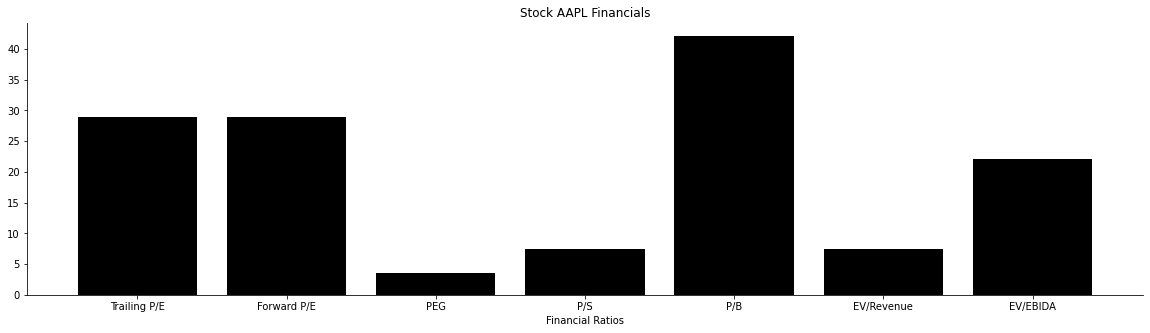

In [9]:
# Histogram of Apple

fig, ax = plt.subplots(figsize=(20,5)) 

ax.bar(aapl.index, aapl['Recent'], color='black')

ax.set_xlabel('Financial Ratios')
ax.set_title('Stock AAPL Financials')


sns.despine(ax=ax)

plt.show()

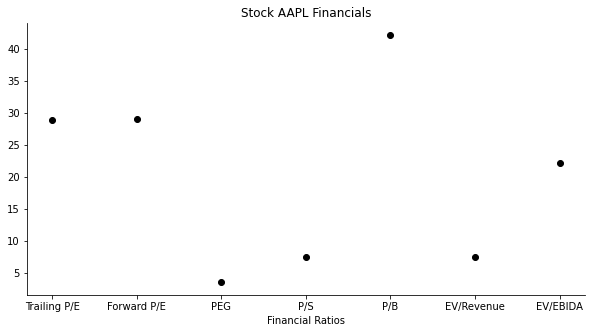

In [10]:
# Scatterplot of Apple

fig, ax = plt.subplots(figsize=(10,5)) 
ax.scatter(aapl.index, aapl['Recent'],        
           color='black')  

ax.set_xlabel('Financial Ratios')
ax.set_title('Stock AAPL Financials')
#ax.set_xlim(0, 20000)
sns.despine(ax=ax)

plt.show()

In [11]:
# Create a new column with the average of each ratio

for ratio in new_stat[new_stat['Ticker'] == 'AAL'].index:
    avg = []
    avg.append('Average')
    avg.append(new_stat.loc[ratio].mean(skipna = True)['Recent'])
    print(avg)
    new_stat.loc[len(new_stat.index)] = avg

new_stat[-10:]

['Average', 42.20079710144929]
['Average', 29.23193430656934]
['Average', 3.732911392405064]
['Average', 5.414265232974908]
['Average', 14.164258555133074]
['Average', 6.2845627376425846]
['Average', 21.78433734939757]


C:\Users\susilo2\AppData\Local\Temp\26/ipykernel_8364/2502559041.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  avg.append(new_stat.loc[ratio].mean(skipna = True)['Recent'])


,Ticker,Recent
Attribute,,
P/B,ZBH,NaN
EV/Revenue,ZBH,NaN
EV/EBIDA,ZBH,NaN
2296,Average,42.200797
2297,Average,29.231934
2298,Average,3.732911
2299,Average,5.414265
2300,Average,14.164259
2301,Average,6.284563


In [12]:
new_stat.rename(index = {2296: 'Trailing P/E', 
                         2297: 'Forward P/E', 
                         2298: 'PEG', 
                         2299: 'P/S', 
                         2300: 'P/B', 
                         2301: 'EV/Revenue',
                         2302: 'EV/EBIDA'}, 
                inplace = True)
new_stat[-10:]

,Ticker,Recent
Attribute,,
P/B,ZBH,NaN
EV/Revenue,ZBH,NaN
EV/EBIDA,ZBH,NaN
Trailing P/E,Average,42.200797
Forward P/E,Average,29.231934
PEG,Average,3.732911
P/S,Average,5.414265
P/B,Average,14.164259
EV/Revenue,Average,6.284563


In [13]:
avg = new_stat[new_stat['Ticker'] == 'Average']
avg

,Ticker,Recent
Attribute,,
Trailing P/E,Average,42.200797
Forward P/E,Average,29.231934
PEG,Average,3.732911
P/S,Average,5.414265
P/B,Average,14.164259
EV/Revenue,Average,6.284563
EV/EBIDA,Average,21.784337


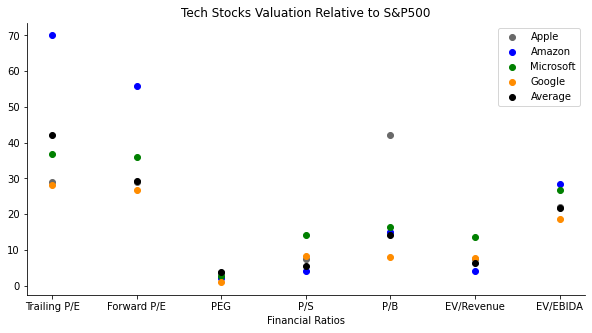

In [14]:
# Valuation of Tech Stocks Relative to the Market

aapl = new_stat[(new_stat['Ticker'] == 'AAPL')]
amzn = new_stat[new_stat['Ticker'] == 'AMZN']
msft = new_stat[new_stat['Ticker'] == 'MSFT']
goog = new_stat[new_stat['Ticker'] == 'GOOG']

fig, ax = plt.subplots(figsize=(10,5)) 
ax.scatter(aapl.index, aapl['Recent'],        
           color = 'dimgrey',
           label = 'Apple') 

ax.scatter(amzn.index, amzn['Recent'],        
           color = 'blue',
           label = 'Amazon') 

ax.scatter(msft.index, msft['Recent'],        
           color = 'green',
           label = 'Microsoft') 

ax.scatter(goog.index, goog['Recent'],        
           color = 'darkorange',
           label = 'Google') 

ax.scatter(avg.index, avg['Recent'],        
           color = 'black',
           label = 'Average') 

ax.set_xlabel('Financial Ratios')
ax.set_title('Tech Stocks Valuation Relative to S&P500')
ax.legend()
sns.despine(ax=ax)

plt.savefig('tech_val.svg')
plt.show()

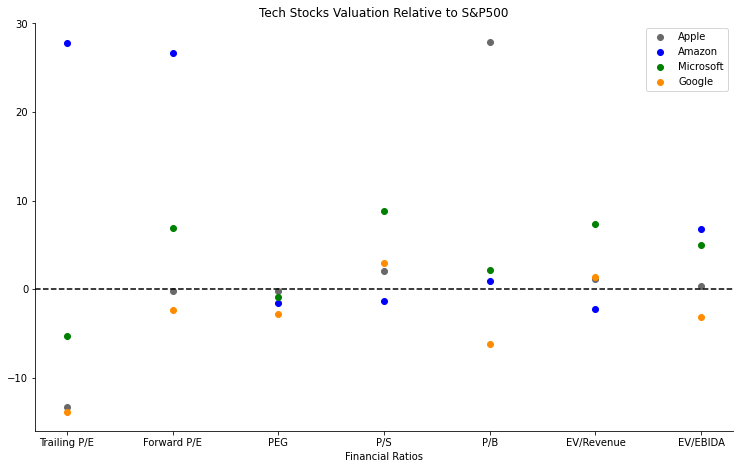

In [15]:
aapl2 = aapl['Recent'] - avg['Recent']
amzn2 = amzn['Recent'] - avg['Recent']
msft2 = msft['Recent'] - avg['Recent']
goog2 = goog['Recent'] - avg['Recent']

fig, ax = plt.subplots(figsize=(12.5,7.5)) 
ax.scatter(aapl2.index, aapl2,        
           color = 'dimgrey',
           label = 'Apple') 

ax.scatter(amzn2.index, amzn2,        
           color = 'blue',
           label = 'Amazon') 

ax.scatter(msft2.index, msft2,        
           color = 'green',
           label = 'Microsoft') 

ax.scatter(goog2.index, goog2,        
           color = 'darkorange',
           label = 'Google') 

plt.axhline(y=0, color = 'black', linestyle='--')

ax.set_xlabel('Financial Ratios')
ax.set_title('Tech Stocks Valuation Relative to S&P500')
ax.legend()
sns.despine(ax=ax)

plt.savefig('tech_val.svg')
plt.show()

In [68]:
# Table showing the number of over/under-valued metrics

value = pd.DataFrame(columns = ['Trailing P/E', 'Forward P/E', 'PEG', 'P/S', 'P/B', 'EV/Revenue', 'EV/EBIDA'])
value = value.rename(columns = {'Attribute': 'Stock'})
value = value.append(aapl2).append(amzn2).append(msft2).append(goog2)
value['Stock'] = ['Apple', 'Amazon', 'Microsoft', 'Google']
value = value.set_index('Stock')
value

,Trailing P/E,Forward P/E,PEG,P/S,P/B,EV/Revenue,EV/EBIDA
Stock,,,,,,,
Apple,-13.330797,-0.241934,-0.252911,2.055735,27.945741,1.145437,0.295663
Amazon,27.829203,26.638066,-1.602911,-1.394265,0.895741,-2.244563,6.755663
Microsoft,-5.320797,6.868066,-0.932911,8.785735,2.125741,7.375437,4.955663
Google,-13.920797,-2.421934,-2.862911,2.935735,-6.204259,1.365437,-3.124337


In [62]:
# S&P 500 Weighting by Sector

data = pd.read_csv('financials.csv')

data.head()

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387211e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813863e+11,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [17]:
sectors = data['Sector'].unique()
sectors

array(['Industrials', 'Health Care', 'Information Technology',
       'Consumer Discretionary', 'Utilities', 'Financials', 'Materials',
       'Real Estate', 'Consumer Staples', 'Energy',
       'Telecommunication Services'], dtype=object)

In [18]:
weight = {'Sector': [], 'Market Cap': []}
tot_mkt = data['Market Cap'].sum()

for sec in sectors:
    perc = data[data['Sector'] == sec]['Market Cap'].sum() / tot_mkt * 100
    weight['Sector'].append(sec) 
    weight['Market Cap'].append(perc)
    

mkt_cap = pd.DataFrame(data = weight)
mkt_cap = mkt_cap.set_index('Sector').rename(index = {'Information Technology': 'Information Tech',
                                                     'Consumer Discretionary': 'Consumer Disc',
                                                      'Telecommunication Services': 'Telecom Services'})
mkt_cap

,Market Cap
Sector,
Industrials,9.698180
Health Care,13.047414
Information Tech,27.053586
Consumer Disc,12.923565
Utilities,2.459723
Financials,13.844853
Materials,2.784133
Real Estate,2.514750
Consumer Staples,8.393322


In [19]:
mkt_cap = mkt_cap.sort_values(by = ['Market Cap'], ascending = False)

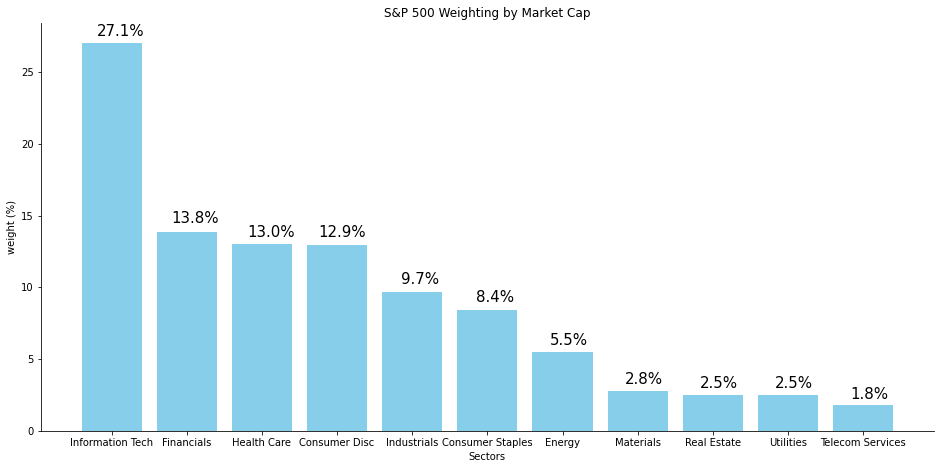

In [30]:
fig, ax = plt.subplots(figsize=(16,7.5)) 

ax.bar(mkt_cap.index, mkt_cap['Market Cap'], color='skyblue')

ax.set_xlabel('Sectors')
ax.set_ylabel('weight (%)')
ax.set_title('S&P 500 Weighting by Market Cap')

ax.text(-0.2, 27.5, '{0:.1f}'.format(mkt_cap.loc['Information Tech'][0]) + '%', fontsize = 15)
ax.text(0.8, 14.5, '{0:.1f}'.format(mkt_cap.loc['Financials'][0]) + '%', fontsize = 15)
ax.text(1.8, 13.5, '{0:.1f}'.format(mkt_cap.loc['Health Care'][0]) + '%', fontsize = 15)
ax.text(2.75, 13.5, '{0:.1f}'.format(mkt_cap.loc['Consumer Disc'][0]) + '%', fontsize = 15)
ax.text(3.85, 10.25, '{0:.1f}'.format(mkt_cap.loc['Industrials'][0]) + '%', fontsize = 15)
ax.text(4.85, 9, '{0:.1f}'.format(mkt_cap.loc['Consumer Staples'][0]) + '%', fontsize = 15)
ax.text(5.825, 6, '{0:.1f}'.format(mkt_cap.loc['Energy'][0]) + '%', fontsize = 15)
ax.text(6.825, 3.25, '{0:.1f}'.format(mkt_cap.loc['Materials'][0]) + '%', fontsize = 15)
ax.text(7.825, 3, '{0:.1f}'.format(mkt_cap.loc['Real Estate'][0]) + '%', fontsize = 15)
ax.text(8.825, 3, '{0:.1f}'.format(mkt_cap.loc['Utilities'][0]) + '%', fontsize = 15)
ax.text(9.825, 2.25, '{0:.1f}'.format(mkt_cap.loc['Telecom Services'][0]) + '%', fontsize = 15)



sns.despine(ax=ax)

plt.savefig('weight.svg')

plt.show()

In [21]:
# Plot the price change of the stocks over the past decade

price = pd.read_csv('sp500_Value.csv')

price.head()

,Unnamed: 0,Ticker,Date,High,Low,Open,Close,Volume,Adj Close
0,0,A,2010-01-04,22.625179,22.267525,22.453505,22.389128,3815561,20.461842
1,1,A,2010-01-05,22.331903,22.002861,22.324751,22.145924,4186031,20.239573
2,2,A,2010-01-06,22.174536,22.002861,22.067240,22.067240,3243779,20.167662
3,3,A,2010-01-07,22.045780,21.816881,22.017166,22.038628,3095172,20.141514
4,4,A,2010-01-08,22.067240,21.745352,21.917025,22.031473,3733918,20.134977


In [22]:
aapl_p = price[price['Ticker'] == 'AAPL']
aapl_p = aapl_p.astype({'Date': 'str'})
aapl_p['Date'] = pd.to_datetime(aapl_p['Date'])
aapl_p = aapl_p.set_index('Date')
aapl_p.head()

,Unnamed: 0,Ticker,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,,
2010-01-04,8991,AAPL,7.660714,7.585000,7.622500,7.643214,493729600,6.553025
2010-01-05,8992,AAPL,7.699643,7.616071,7.664286,7.656429,601904800,6.564355
2010-01-06,8993,AAPL,7.686786,7.526786,7.656429,7.534643,552160000,6.459942
2010-01-07,8994,AAPL,7.571429,7.466071,7.562500,7.520714,477131200,6.447999
2010-01-08,8995,AAPL,7.571429,7.466429,7.510714,7.570714,447610800,6.490866


In [23]:
amzn_p = price[price['Ticker'] == 'AMZN'].astype({'Date': 'str'})
amzn_p['Date'] = pd.to_datetime(amzn_p['Date'])
amzn_p = amzn_p.set_index('Date')
amzn_p.head()

,Unnamed: 0,Ticker,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,,
2010-01-04,99572,AMZN,136.610001,133.139999,136.250000,133.899994,7599900,133.899994
2010-01-05,99573,AMZN,135.479996,131.809998,133.429993,134.690002,8851900,134.690002
2010-01-06,99574,AMZN,134.729996,131.649994,134.600006,132.250000,7178800,132.250000
2010-01-07,99575,AMZN,132.320007,128.800003,132.009995,130.000000,11030200,130.000000
2010-01-08,99576,AMZN,133.679993,129.029999,130.559998,133.520004,9830500,133.520004


In [24]:
msft_p = price[price['Ticker'] == 'MSFT'].astype({'Date': 'str'})
msft_p['Date'] = pd.to_datetime(msft_p['Date'])
msft_p = msft_p.set_index('Date')
msft_p.head()

,Unnamed: 0,Ticker,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,,
2010-01-04,911777,MSFT,31.100000,30.590000,30.620001,30.950001,38409100,23.904980
2010-01-05,911778,MSFT,31.100000,30.639999,30.850000,30.959999,49749600,23.912706
2010-01-06,911779,MSFT,31.080000,30.520000,30.879999,30.770000,58182400,23.765961
2010-01-07,911780,MSFT,30.700001,30.190001,30.629999,30.450001,50559700,23.518797
2010-01-08,911781,MSFT,30.879999,30.240000,30.280001,30.660000,51197400,23.680994


In [25]:
goog_p = price[price['Ticker'] == 'GOOG'].astype({'Date': 'str'})
goog_p['Date'] = pd.to_datetime(goog_p['Date'])
goog_p = goog_p.set_index('Date')
goog_p.head()

,Unnamed: 0,Ticker,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,,
2010-01-04,583010,GOOG,313.579620,310.954468,312.304413,312.204773,3927065,312.204773
2010-01-05,583011,GOOG,312.747742,309.609497,312.418976,310.829926,6031925,310.829926
2010-01-06,583012,GOOG,311.761444,302.047852,311.761444,302.994293,7987226,302.994293
2010-01-07,583013,GOOG,303.861053,295.218445,303.562164,295.940735,12876685,295.940735
2010-01-08,583014,GOOG,300.498657,293.455048,294.894653,299.885956,9484016,299.885956


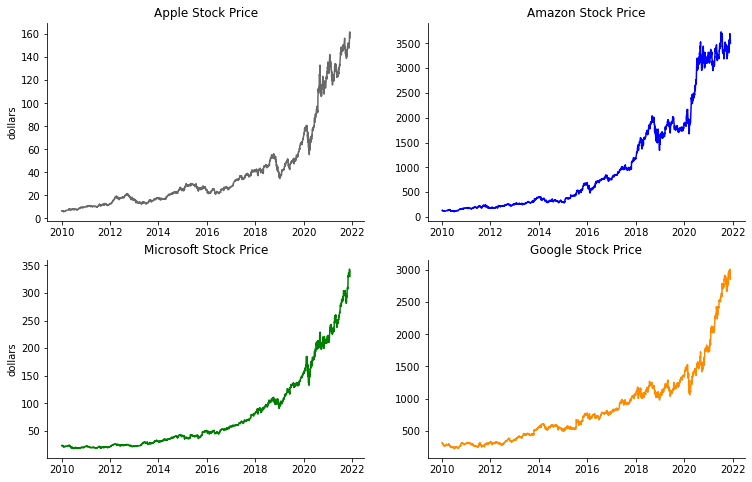

In [26]:
fig, ax = plt.subplots(2,2, figsize=(12.5,8)) 

ax[0][0].plot(aapl_p.index, aapl_p['Adj Close'], color = 'dimgrey')
ax[0][1].plot(amzn_p.index, amzn_p['Adj Close'], color = 'blue')
ax[1][0].plot(msft_p.index, msft_p['Adj Close'], color = 'green')
ax[1][1].plot(goog_p.index, goog_p['Adj Close'], color = 'darkorange')

ax[0][0].set_title('Apple Stock Price')
ax[0][1].set_title('Amazon Stock Price')
ax[1][0].set_title('Microsoft Stock Price')
ax[1][1].set_title('Google Stock Price')

ax[0][0].set_ylabel('dollars')
ax[1][0].set_ylabel('dollars')


sns.despine(ax=ax[0][0])
sns.despine(ax=ax[0][1])
sns.despine(ax=ax[1][0])
sns.despine(ax=ax[1][1])

plt.savefig('prices.svg')

plt.show()